In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
#nltk.download()

In [3]:
#read the file
data = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [4]:
# view the data
data.head(100)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
95,0,number of homeless students in america is risi...,https://www.huffingtonpost.com/entry/homeless-...
96,1,report: majority of instances of people gettin...,https://www.theonion.com/report-majority-of-in...
97,1,groundbreaking study finds gratification can b...,https://www.theonion.com/groundbreaking-study-...
98,0,nick cannon responds to mariah carey's engagem...,https://www.huffingtonpost.com/entry/nick-cann...


In [5]:



# shape of the data
data.shape

(28619, 3)

In [6]:
data_len = data['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'We have {data_len} words in the headline')

We have 287674 words in the headline


In [7]:
# check the columns names
data.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [8]:
# check the data types in the columns
data.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [9]:
#checking the unique values in 'is_sarcastic' column
data.is_sarcastic.unique()

array([1, 0], dtype=int64)

In [10]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

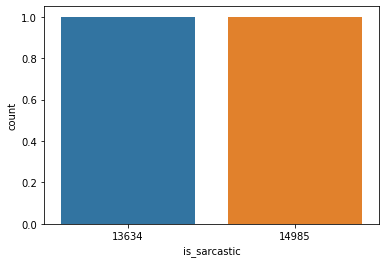

In [11]:
#checking the value counts in 'is_sarcastic' column
data.is_sarcastic.value_counts()
sns.countplot(data['is_sarcastic'].value_counts())
plt.show()

In [12]:
# check the null values in data
data.isna().sum() 

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [13]:

#drop 'article_link' column
data = data.drop('article_link', axis=1)

In [14]:
#ckeck the data
data.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


In [15]:
#import necessary library
import re
from nltk.corpus import stopwords

set_stopwords = set(stopwords.words("english"))


def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

data['headline'] = data['headline'].apply(clean_txt)

In [16]:
data_clean_len = data['headline'].apply(lambda x: len(x.split(' '))).sum() 
print(f'After text cleaning we have only {data_clean_len} words to work with')

After text cleaning we have only 205988 words to work with


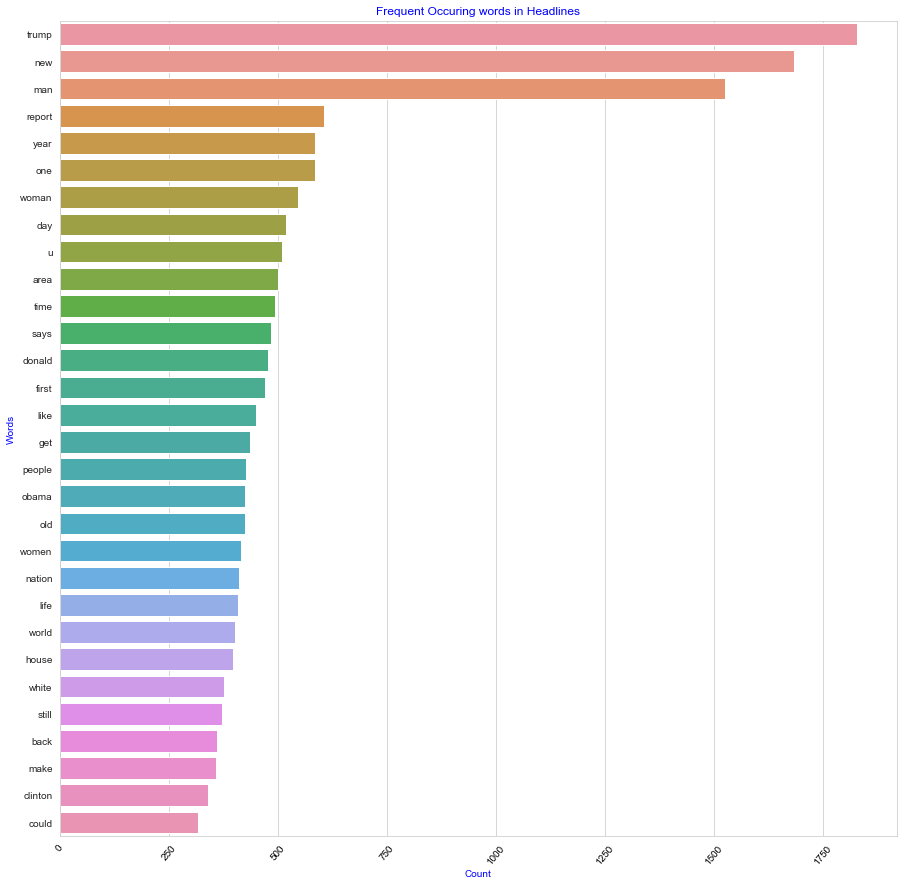

In [17]:
from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

text = data['headline']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0) #converting to Dataframe and drop the Nones values
#result_df
#vizualize result
sns.set_style("whitegrid") 
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

In [18]:
#create DataFrame for sarcastic words 
sarcastic = pd.DataFrame(data[data['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [19]:
#create DataFrame for non_sarcastic words 
non_sarcastic = pd.DataFrame(data[data['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()
#vizualize result

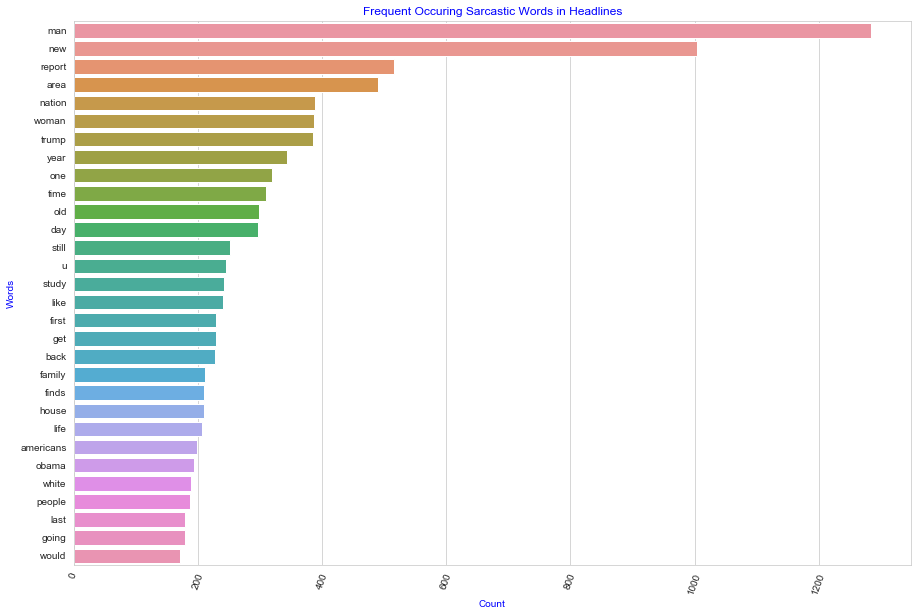

In [20]:
#vizualize result
sns.set_style("whitegrid") 
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=sarcastic['index'][0:30], x=sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

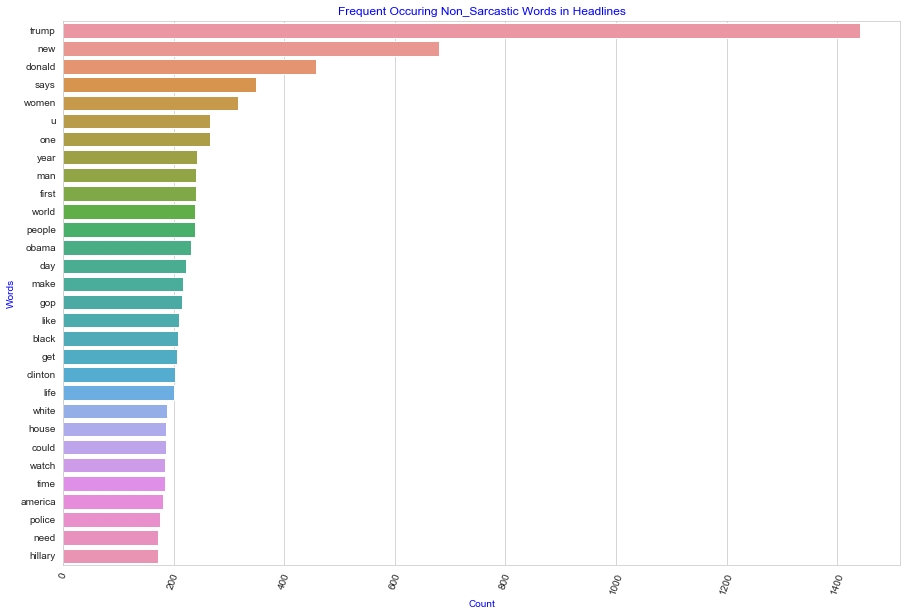

In [21]:
#vizualize result
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10)) 
sns.barplot(y=non_sarcastic['index'][0:30], x=non_sarcastic[0][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequent Occuring Non_Sarcastic Words in Headlines", color="blue") 
plt.xticks(rotation=70);
plt.show()

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


'C:\Users\k' is not recognized as an internal or external command,
operable program or batch file.


In [23]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

sarcasctic_2 = [every_word.lower() for every_word in sarcastic['index']]

sarc_nonstop = [word for word in sarcasctic_2 if word not in stopwords]

non_sarcasctic_2 = [every_word.lower() for every_word in non_sarcastic['index']]

non_sarc_nonstop = [word for word in non_sarcasctic_2 if word not in stopwords]

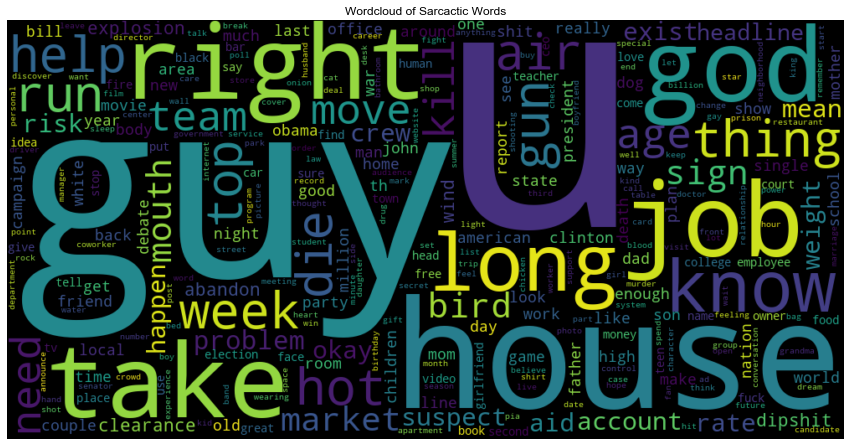

In [24]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords, 
                      ).generate(' ' .join(word for word in sarc_nonstop))

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Sarcactic Words', color="black")
plt.axis("off")
plt.show()

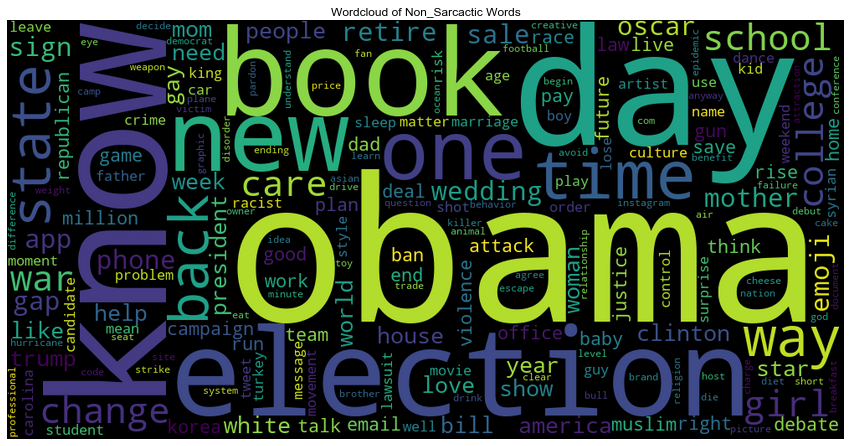

In [25]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(15,10))
wordcloud = WordCloud(width=1000, height=500,
                      max_words=300, min_font_size = 10,
                      background_color="black",
                      stopwords = stopwords,
                      ).generate(' ' .join(word for word in non_sarc_nonstop))

plt.imshow(wordcloud, interpolation='spline36')
plt.title('Wordcloud of Non_Sarcactic Words', color="black")
plt.axis("off")
plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv =  TfidfVectorizer(stop_words=set_stopwords, use_idf=True, smooth_idf=False, norm=None, decode_error='replace', max_features=2000)
X_cv = cv.fit_transform(data['headline']).toarray()
y = data.iloc[:, -1].values
cv.get_feature_names()
df = pd.DataFrame(X_cv, columns=cv.get_feature_names())
df

,able,abortion,absolutely,abuse,accept,access,accident,accidentally,according,account,...,years,yes,yet,yoga,york,young,youth,zero,zoo,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.model_selection import train_test_split # import library for train_test_split
X = text
y = data.is_sarcastic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

## Multinomial Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import MultinomialNB 
#?MultinomialNB 

In [29]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score, accuracy_score, classification_report


pipe1 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1,)), 
                   ('MNB', MultinomialNB()),])

parameters1 = {'vectr__ngram_range': [(1,1),(1,2),(1,3)],
                    'MNB__alpha': [0.05,0.1,0.5,1.0,2.0,4.0],
                'MNB__fit_prior': [True]}
gridMNB = GridSearchCV(pipe1, parameters1 ,cv=7,n_jobs=-1, verbose=3)
gridMNB.fit(X_train, y_train)

%time y_pred1 = gridMNB.predict(X_test)

#getting the best accuracy and parameters
print('MNB_Train Accuracy : %.3f'%gridMNB.best_estimator_.score(X_train, y_train))
print('MNB_Test Accuracy : %.3f'%gridMNB.best_estimator_.score(X_test, y_test))
print('MNB_Best Accuracy Through Grid Search : %.3f'%gridMNB.best_score_)
print('MNB_Best Parameters : ',gridMNB.best_params_)
print(15*'--->--->')
print('classification_report: \n', classification_report(y_test, y_pred1))

Fitting 7 folds for each of 18 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:   39.9s finished


Wall time: 114 ms
MNB_Train Accuracy : 0.990
MNB_Test Accuracy : 0.815
MNB_Best Accuracy Through Grid Search : 0.809
MNB_Best Parameters :  {'MNB__alpha': 1.0, 'MNB__fit_prior': True, 'vectr__ngram_range': (1, 2)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1493
           1       0.80      0.82      0.81      1369

    accuracy                           0.82      2862
   macro avg       0.81      0.82      0.82      2862
weighted avg       0.82      0.82      0.82      2862



## Stochastic Gradient Descent Classifier

## KNeighbors Classifier

In [30]:
from sklearn.linear_model import SGDClassifier

pipe2 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('SGD', SGDClassifier(loss='modified_huber', penalty='l2',alpha=0.0001,shuffle=True,
                                      learning_rate='optimal',random_state=None, max_iter=100,)),
                   ])
parameters2 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'SGD__alpha': [0.0001,0.01,1,10],
                'SGD__max_iter': [1,10,100,1000],
                  'SGD__loss': ['modified_huber'],
                  'SGD__penalty': ['l2']}

              
gridSGD = GridSearchCV(pipe2, parameters2 ,cv=8, n_jobs=-1, verbose=3)
gridSGD.fit(X_train, y_train)

%time y_pred2 = gridSGD.predict(X_test)

print('SGD_Train Accuracy : %.3f'%gridSGD.best_estimator_.score(X_train, y_train))
print('SGD_Test Accuracy : %.3f'%gridSGD.best_estimator_.score(X_test, y_test))
print('SGD_Best Accuracy Through Grid Search : %.3f'%gridSGD.best_score_)
print('SGD_Best Parameters : ',gridSGD.best_params_)
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred2)) 

Fitting 8 folds for each of 32 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   49.7s finished
C:\Users\k sai sujith reddy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Wall time: 90.2 ms
SGD_Train Accuracy : 0.995
SGD_Test Accuracy : 0.810
SGD_Best Accuracy Through Grid Search : 0.809
SGD_Best Parameters :  {'SGD__alpha': 0.0001, 'SGD__loss': 'modified_huber', 'SGD__max_iter': 10, 'SGD__penalty': 'l2', 'vectr__ngram_range': (1, 2)}
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1493
           1       0.79      0.81      0.80      1369

    accuracy                           0.81      2862
   macro avg       0.81      0.81      0.81      2862
weighted avg       0.81      0.81      0.81      2862



In [31]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.1, random_state = 0)

pipe3 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                  ('tfidf', TfidfTransformer()),
                  ('KN', KNeighborsClassifier(n_neighbors=5, algorithm='brute', weights='uniform', metric='minkowski')),
                   ])

                
parameters3 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'KN__n_neighbors': [15,30,45,60,75,90],
                    'KN__p': [2],
                    'KN__leaf_size': [10,20]
              }


gridKN = KNeighborsClassifier()#GridSearchCV(pipe3, parameters3, scoring='accuracy',cv=6, n_jobs=-1, verbose=3)
gridKN.fit(X_train[0:3000], y_train[0:3000])

%time y_pred3 = gridKN.predict(X_test[0:500])
'''
print('KN_Train Accuracy : %.3f'%gridKN.best_estimator_.score(X_train, y_train))
print('KN_Test Accuracy : %.3f'%gridKN.best_estimator_.score(X_test, y_test))
print('KN_Best Accuracy Through Grid Search : %.3f'%gridKN.best_score_)
print('KN_Best Parameters : ',gridKN.best_params_)
'''
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test[0:500], y_pred3))  


Wall time: 7.85 s
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.59      0.81      0.68       251
           1       0.69      0.43      0.53       249

    accuracy                           0.62       500
   macro avg       0.64      0.62      0.61       500
weighted avg       0.64      0.62      0.61       500



## Logistic Regression Classifier

In [32]:
from sklearn.linear_model import LogisticRegression

pipe4 = Pipeline([('vectr', CountVectorizer(analyzer='word', preprocessor=None, min_df=1)),
                ('tfidf', TfidfTransformer()),
                ('LR', LogisticRegression(penalty='l2',C=1.0,random_state=None,
                                          solver='liblinear',intercept_scaling=1, max_iter=100,)),
               ])

parameters4 = {'vectr__ngram_range': [(1,1),(1,2)],
                    'LR__C': [3,4,5,6,7],
                    'LR__tol': [0.0001,0.01,0.1],
                  'LR__max_iter': [50,75,100]
              }

gridLR = LogisticRegression()#GridSearchCV(pipe4, parameters4 ,cv=4, verbose=1, n_jobs=-1)
gridLR.fit(X_train[0:10000], y_train[0:10000])

%time y_pred4 = gridLR.predict(X_test)
'''
print('LR_Train Accuracy : %.3f'%gridLR.best_estimator_.score(X_train, y_train))
print('LR_Test Accuracy : %.3f'%gridLR.best_estimator_.score(X_test, y_test))
print('LR_Best Accuracy Through Grid Search : %.3f'%gridLR.best_score_)
print('LR_Best Parameters : ',gridLR.best_params_)
'''
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test, y_pred4))

Wall time: 15.1 ms
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.75      1493
           1       0.73      0.71      0.72      1369

    accuracy                           0.73      2862
   macro avg       0.73      0.73      0.73      2862
weighted avg       0.73      0.73      0.73      2862



## Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

pipe5 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('DTree', DecisionTreeClassifier(criterion='gini', splitter='best',random_state=0 ,min_samples_leaf=1)),
               ])

parameters5 = {'vectr__ngram_range': [(1,1),(1,2)],
               'DTree__criterion' : ['gini'],
               'DTree__max_features': ['auto'],
               'DTree__max_depth': [2, 3, 5, 10, 15],
               'DTree__min_samples_split': [2, 3, 5, 7, 9],
               'DTree__min_samples_leaf': [1,5,8,11],
              }

gridDtree = DecisionTreeClassifier()#GridSearchCV(pipe5, parameters5 ,cv=5)
gridDtree.fit(X_train[0:3000], y_train[0:3000])

%time y_pred5 = gridDtree.predict(X_test[0:1000])
'''
print('Dtree_Train Accuracy : %.3f'%gridDtree.best_estimator_.score(X_train, y_train))
print('Dtree_Test Accuracy : %.3f'%gridDtree.best_estimator_.score(X_test, y_test))
print('Dtree_Best Accuracy Through Grid Search : %.3f'%gridDtree.best_score_)
print('Dtree_Best Parameters : ',gridDtree.best_params_)
'''
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test[0:1000], y_pred5)) 

Wall time: 16.5 ms
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       525
           1       0.62      0.64      0.63       475

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.65      1000



##  Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipe6 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('RF', RandomForestClassifier(n_estimators=100,criterion='gini', max_features='auto',
                                               random_state=None ,min_samples_leaf=1)),
               ])

parameters6 = {'vectr__ngram_range': [(1,1),(1,2)],
               'RF__n_estimators': [100,200],
                'RF__criterion': ['gini'],
               'RF__min_samples_split': [2],
               'RF__min_samples_leaf': [1],
              }

gridRF = RandomForestClassifier()#GridSearchCV(pipe6, parameters6 ,cv=8, verbose=1, n_jobs=-1)
gridRF.fit(X_train[0:6000], y_train[0:6000])

%time y_pred6 = gridRF.predict(X_train[0:500])
'''
print('RF_Train Accuracy : %.3f'%gridRF.best_estimator_.score(X_train, y_train))
print('RF_Test Accuracy : %.3f'%gridRF.best_estimator_.score(X_test, y_test))
print('RF_Best Accuracy Through Grid Search : %.3f'%gridRF.best_score_)
print('RF_Best Parameters : ',gridRF.best_params_)
'''
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_train[0:500], y_pred6)) 

Wall time: 14.6 ms
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       261
           1       0.98      0.98      0.98       239

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



## Support Vector Classification

In [35]:
from sklearn.svm import SVC

pipe7 = Pipeline([('vectr', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('SVC', SVC(C=1.0, kernel='rbf', max_iter=-1,
                                random_state=None ,cache_size=200)),
               ])

parameters7 = {'vectr__ngram_range': [(1,1),(1,2)],
               'SVC__C': [0.1,1,10],
                'SVC__kernel': ['rbf'],
              'SVC__degree': [1,2,3],
               'SVC__cache_size': [50,100,200]
              }

gridSVC = SVC()#GridSearchCV(pipe7, parameters7 ,cv=3, verbose=3, n_jobs=-1)
gridSVC.fit(X_train[0:3000], y_train[0:3000])

%time y_pred7 = gridSVC.predict(X_test[0:500])
'''
print('SVC_Train Accuracy : %.3f'%gridSVC.best_estimator_.score(X_train, y_train))
print('SVC_Test Accuracy : %.3f'%gridSVC.best_estimator_.score(X_test, y_test))
print('SVC_Best Accuracy Through Grid Search : %.3f'%gridSVC.best_score_)
print('SVC_Best Parameters : ',gridSVC.best_params_)
'''
print(15*'--->--->')
print('classification_report: \n',  classification_report(y_test[0:500], y_pred7))

Wall time: 5.01 s
--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->--->
classification_report: 
               precision    recall  f1-score   support

           0       0.61      0.98      0.75       251
           1       0.94      0.37      0.53       249

    accuracy                           0.67       500
   macro avg       0.77      0.67      0.64       500
weighted avg       0.77      0.67      0.64       500



In [36]:
#perform prediction on test data taking from user


print("Enter your text")
text_data = input()


Enter your text
"Wow, you're a real genius for figuring that out."


In [37]:
process_text = clean_txt(text_data)
vector = cv.transform([process_text]).toarray()
predict = gridRF.predict(vector)[0]
labels = ['Not Sarcastic', 'Sarcastic']
print("Input Text = "+text_data+" Predicted As ===> "+labels[predict])

Input Text = "Wow, you're a real genius for figuring that out." Predicted As ===> Not Sarcastic
